In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from Clase_analysis import Analysis

In [2]:
P='C:/Users/Mikel/LaserLab Dropbox/Proyectos/data/5CMOS/VS006_A1_Quartz_ANN205_Ba/VS006_A1_Quartz_ANN205_Ba_P9_20221014/'
#os.listdir(P)

In [3]:
s=Analysis(P,filterset=2)

# Histograma de darks

Tienen un pico centrado alrededor de 1660, y una cola que se extiende hacia cuentas mas altas. Esta cola son los 'hot pixel'

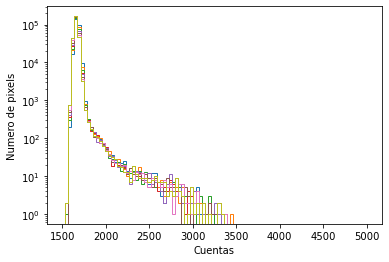

In [15]:
s.Darks_hist()

Si restamos dos darks, vemos que la cola que corresponde a los 'hot pixels' desaparece (quedan algunas cuentas individuales). Es decir, siempre son los mismos pixels los que contribuyen a la cola.

Text(0, 0.5, 'Numero de pixels')

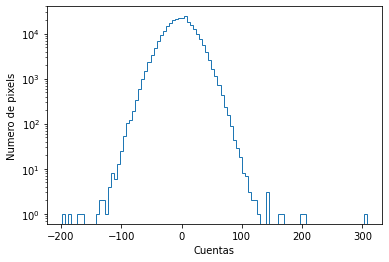

In [16]:
dark_diff=s.Dark(4)-s.Dark(3)
plt.hist(dark_diff.flatten(),bins=100,log=True,histtype=u'step');
plt.xlabel('Cuentas')
plt.ylabel('Numero de pixels')


Los darks no se mantienen estables en el tiempo:

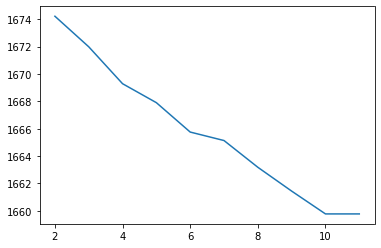

In [18]:
means=[]
for filt in s.filts:
    d=np.mean(s.Dark(filt))
    means.append(d)
plt.plot(s.filts,means)

# Procesado de imagenes

1: Restar el dark a la imagen

2: Threshold a 3 sigmas respecto a la media de los dark

3: Filtro para quitar objetos pequeños (eliminar pixeles individuales)

### Imagen original

Se pueden ver algunos hot pixel a simple vista

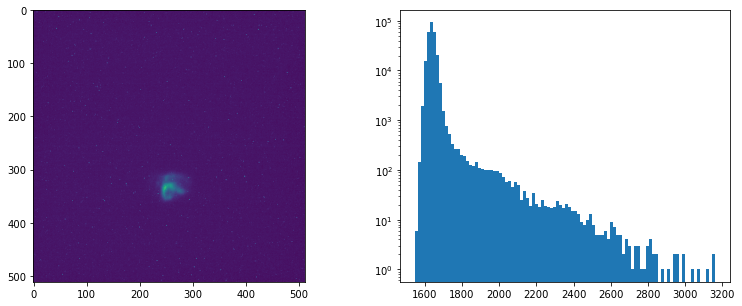

In [40]:
im=s.Image(3,10)
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(im)
ax[1].hist(im.flatten(),bins=100,log=True);

### Imagen-dark

Con los dark se ha visto que al restar el dark a la imagen se elimina la mayoria de los hot pixel que contribuyen a la cola del histograma. Por lo tanto, la cola de este histograma se corresponde a la señal.

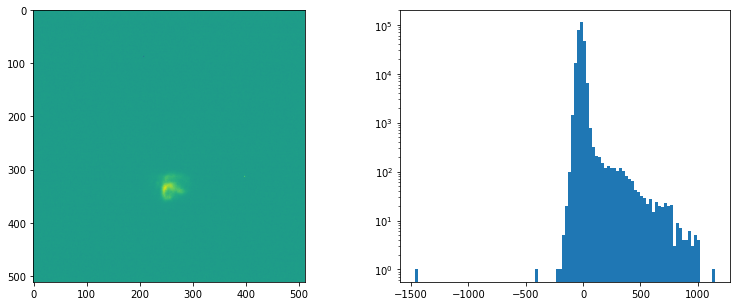

In [41]:
im=s.Image_dark(3,10)
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(im)
ax[1].hist(im.flatten(),bins=100,log=True);

### Imagen procesada

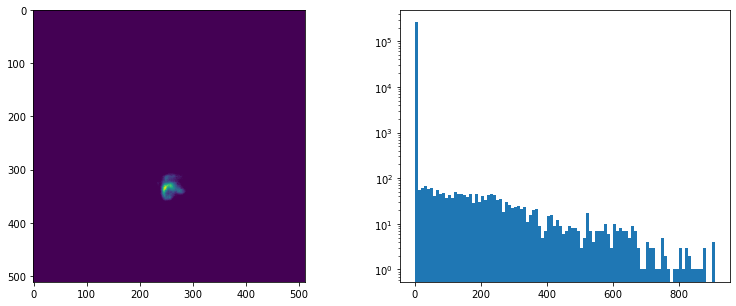

In [42]:
thresh=s.Thresh(nsigma=3)
im=s.Processed_im(3,10,thresh)
fig,ax=plt.subplots(1,2,figsize=(13,5))
ax[0].imshow(im)
ax[1].hist(im.flatten(),bins=100,log=True);

# Espectro de la muestra

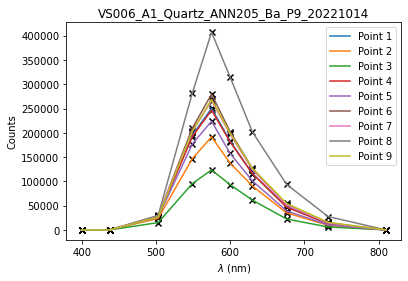

In [6]:
s.Spectrum(True);

# Posiciones y fit con plano

array([], dtype=float64)

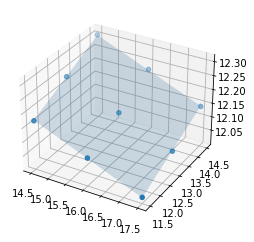

In [43]:
s.OutOfPlane()